# Machine Intelligence II

## Exercise Sheet 01 - Principal Componenet Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise H1.1: PCA: 2-dimensional Toy Data

### a)

In [2]:
pca_2d_data = np.loadtxt('pca-data-2d.dat')
print(pca_2d_data.shape)

(10, 2)


In [3]:
pca_2d_data

array([[ 2.4, -2.5],
       [ 0.7, -0.5],
       [ 2.9, -2.2],
       [ 2.2, -1.9],
       [ 3. , -3.1],
       [ 2.7, -2.3],
       [ 1.6, -2. ],
       [ 1.1, -1. ],
       [ 1.6, -1.5],
       [ 0.9, -1.1]])

In [4]:
# axis = 0 means we want to take avg along columns
mean_pca_2d_data = np.mean(pca_2d_data,axis=0)
print(mean_pca_2d_data)

[ 1.91 -1.81]


In [5]:
#For PCA to work properly, you have to subtract the mean from each of the data dimensions
centered_data = np.subtract(pca_2d_data, mean_pca_2d_data)
print(centered_data)

[[ 0.49 -0.69]
 [-1.21  1.31]
 [ 0.99 -0.39]
 [ 0.29 -0.09]
 [ 1.09 -1.29]
 [ 0.79 -0.49]
 [-0.31 -0.19]
 [-0.81  0.81]
 [-0.31  0.31]
 [-1.01  0.71]]


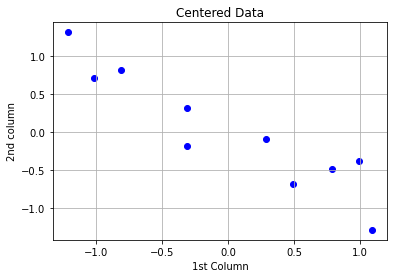

In [6]:
plt.scatter(centered_data.T[0], centered_data.T[1], c='b')
plt.xlabel('1st Column')
plt.ylabel('2nd column')
plt.title("Centered Data")
plt.grid()
plt.show()

### b)

In [7]:
#Calculate the covariance
cen = centered_data.T
cen

array([[ 0.49, -1.21,  0.99,  0.29,  1.09,  0.79, -0.31, -0.81, -0.31,
        -1.01],
       [-0.69,  1.31, -0.39, -0.09, -1.29, -0.49, -0.19,  0.81,  0.31,
         0.71]])

In [8]:
cov = np.cov(cen)
cov

array([[ 0.71655556, -0.61544444],
       [-0.61544444,  0.61655556]])

In [9]:
# Calculate the eigenvalues and eigenvectors
# eigval = Eigenvalues, eigvec = eigenvectors
eigval,eigvec = np.linalg.eig(cov)
eigvec

array([[ 0.73517866,  0.6778734 ],
       [-0.6778734 ,  0.73517866]])

Now we need to order the eigenvectors. So we take the minimum eigenvector value and max to show the highest and lowest variance and move them in descending order

In [10]:
low_eigvec = eigvec[0][0]
low_eigvec

0.735178655544408

In [11]:
high_eigvec = eigvec[1][0]
high_eigvec

-0.6778733985280117

In [12]:
#To find the lowest matrix, we can take tranpose of the matrix and then take out values with highest to lowest variance
eigvec_T = eigvec.T
evec1 = eigvec_T[0]
evec1

array([ 0.73517866, -0.6778734 ])

##### Now we create another scatter plot of the same data points in the coordinate system spanned by the 2 PCs.

In [13]:
# So we take take dot product of eigvec.T*centered_data.T. We transpose it to get 10 rows and 2 columns

data_transformed = np.dot(eigvec.T,centered_data.T).T
data_transformed

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

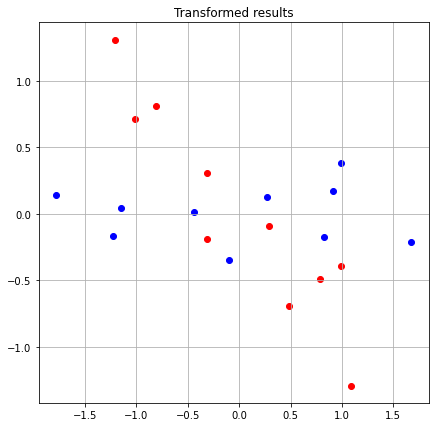

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(data_transformed[:,0],data_transformed[:,1], color = 'blue', label = 'Transformed Data')
plt.scatter(centered_data[:,0],centered_data[:,1], color = 'red', label = 'Centered Data')
plt.title("Transformed results")

plt.grid()
plt.show()

### c)

##### Now we plot using either PC 1 or PC 2 so we take the first eigenvectors or the second eigenvectors. Hence, 


PC 1 $$\begin{bmatrix} 1 & 0  \\ 1 & 0 \\  \end{bmatrix}$$

PC 2 = $$\begin{bmatrix} 0 & 1  \\ 0 & 1 \\  \end{bmatrix}$$

For Scatter plot for PC1, we do is dotproduct(PC1,centered_data.T)


In [15]:
PC1 = np.copy(eigvec)
PC2 = np.copy(eigvec)

In [16]:
 PC1[:, 1] = 0
data_transformed_PC1 = np.dot(PC1, centered_data.T).T
data_transformed_PC1

array([[ 0.36023754, -0.33215797],
       [-0.88956617,  0.82022681],
       [ 0.72782687, -0.67109466],
       [ 0.21320181, -0.19658329],
       [ 0.80134473, -0.738882  ],
       [ 0.58079114, -0.53551998],
       [-0.22790538,  0.21014075],
       [-0.59549471,  0.54907745],
       [-0.22790538,  0.21014075],
       [-0.74253044,  0.68465213]])

In [17]:
PC2[:,0] = 0
data_transformed_PC2 = np.dot(PC2, centered_data.T).T
data_transformed_PC2

array([[-0.46773264, -0.50727327],
       [ 0.88801415,  0.96308404],
       [-0.26437063, -0.28671968],
       [-0.06100861, -0.06616608],
       [-0.87445668, -0.94838047],
       [-0.33215797, -0.36023754],
       [-0.12879595, -0.13968394],
       [ 0.54907745,  0.59549471],
       [ 0.21014075,  0.22790538],
       [ 0.48129011,  0.52197685]])

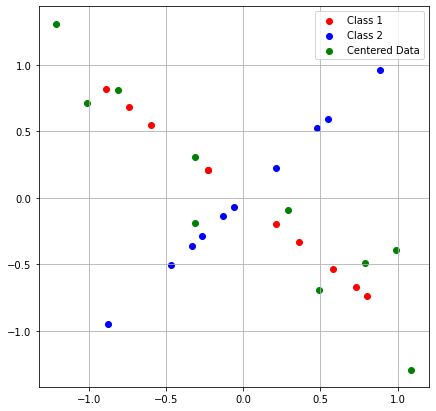

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(data_transformed_PC1[:,0], data_transformed_PC1[:,1], color = 'red', label='Class 1')
plt.scatter(data_transformed_PC2[:,0], data_transformed_PC2[:,1], color = 'blue', label = 'Class 2')
plt.scatter(centered_data[:,0],centered_data[:,1], color = 'green', label = 'Centered Data')
plt.grid()
plt.legend()
plt.show()

# Exercise H1.2: PCA: 3-dimensional Toy Data

### a)

In [19]:
pca_3d_data = np.loadtxt('pca-data-3d.txt', delimiter=',', skiprows=1)
print(pca_3d_data.shape) #500 rows and 3 columns

(500, 3)


In [20]:
pca_3d_data

array([[-0.19426329,  0.2235241 , -0.21112988],
       [ 0.02034613, -0.38014867, -0.99047169],
       [ 0.83225938,  3.05490094, -2.72578164],
       ...,
       [-1.43283404, -3.48706989,  1.83608382],
       [ 0.79887207,  1.11430493,  2.21229285],
       [ 0.90391051,  1.51089626,  0.81628342]])

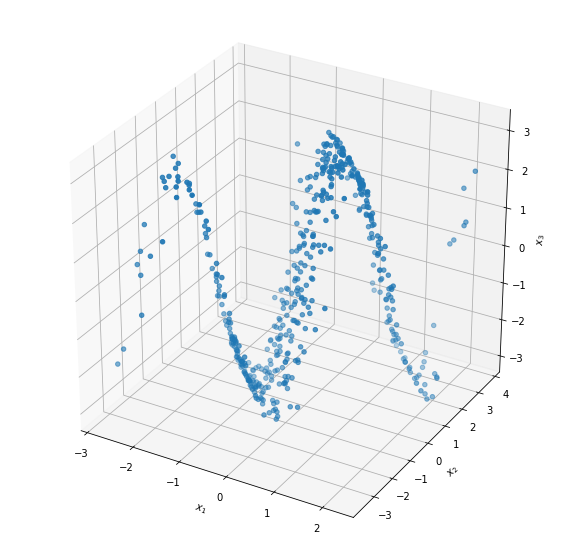

In [21]:
mean_pca3d = np.mean(pca_3d_data, axis=0)
centered_3d = np.subtract(pca_3d_data, mean_pca3d)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(centered_3d[:,0], centered_3d[:,1], centered_3d[:,2])
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{3}$');
plt.show()

### b)

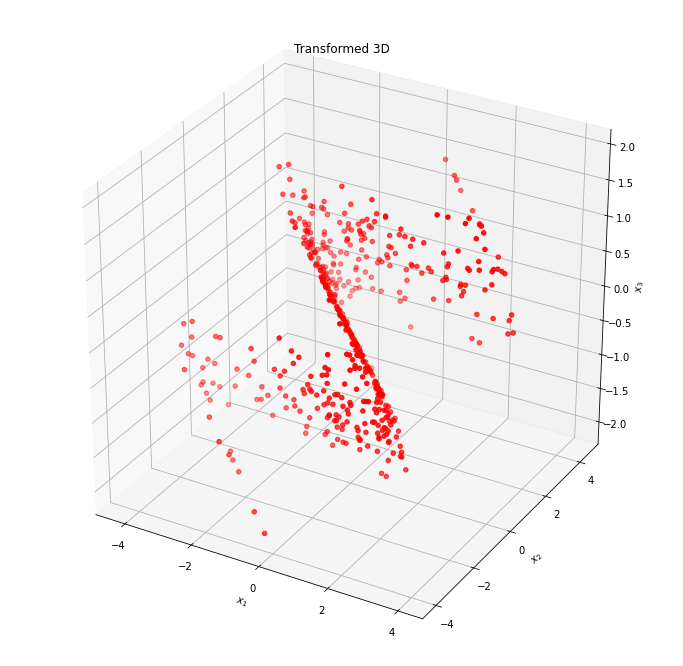

In [22]:
#Calculate eigenvalues
cov_3d = np.cov(centered_3d.T)
eival_3d, eivec_3d = np.linalg.eig(cov_3d)

# Sorts eigenvalues and eigenvectors
idx = eival_3d.argsort()[::-1]   
eival_3d = eival_3d[idx]
eivec_3d = eivec_3d[:,idx]


transformed_data_3d = np.dot(eivec_3d, centered_3d.T).T
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(transformed_data_3d [:,0],transformed_data_3d[:,1], transformed_data_3d[:,2], color = 'red')
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{3}$')
plt.title("Transformed 3D")
plt.show()

### c)

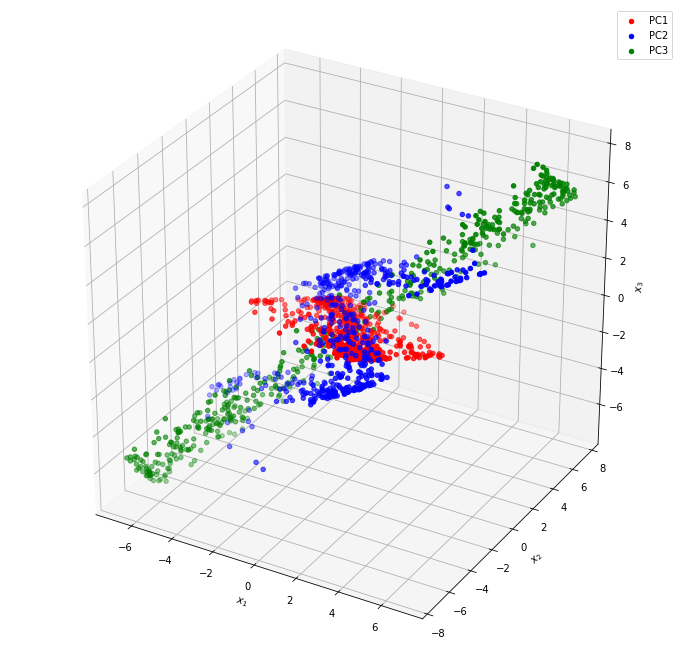

In [23]:
PC1 = np.copy(eivec_3d)
PC2 = np.copy(eivec_3d)
PC3 = np.copy(eivec_3d)

PC1[:,0] = 0
PC2[:,1] = 1
PC3[:,2] = 2

data_transformed_PC1_3D = np.dot(PC1, centered_3d.T).T
data_transformed_PC2_3D = np.dot(PC2, centered_3d.T).T
data_transformed_PC3_3D = np.dot(PC3, centered_3d.T).T

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_transformed_PC1_3D[:,0], data_transformed_PC1_3D[:,1], data_transformed_PC1_3D[:,2], color = 'red', label = 'PC1')
ax.scatter(data_transformed_PC2_3D [:,0], data_transformed_PC2_3D [:,1], data_transformed_PC2_3D [:,2], color = 'blue', label = 'PC2')
ax.scatter(data_transformed_PC3_3D [:,0], data_transformed_PC3_3D [:,1], data_transformed_PC3_3D [:,2], color = 'green', label = 'PC3')
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{3}$');
plt.grid()
plt.legend()
plt.show()

# Exercise H1.3: Projections of a dynamical system

### a)

In [25]:
data = np.loadtxt('expDat.txt', delimiter=',', skiprows=1, usecols=range(1, 21))
print(data.shape), data

(100, 20)


(None,
 array([[1., 0., 0., ..., 4., 2., 1.],
        [2., 2., 2., ..., 1., 1., 2.],
        [3., 2., 3., ..., 1., 1., 3.],
        ...,
        [1., 3., 2., ..., 3., 2., 1.],
        [2., 1., 3., ..., 2., 2., 5.],
        [2., 2., 3., ..., 0., 3., 1.]]))

In [40]:
#Finding mean of the data
mean_data = np.mean(data, axis = 0)

# Covariace, Eigenvalues & Eigenvectors
centered_data = np.subtract(data, mean_data)
cov_20d = np.cov(centered_data.T)
eival_20d, eivec_20d = np.linalg.eig(cov_20d)

# Sorting eigenvectors
idx = eival_20d.argsort()[::-1]   
eival_20d = eival_20d[idx]
eivec_20d = eivec_20d[:,idx]


#Transformed data
transformed_data = np.dot(eivec_20d, centered_data.T)
transformed_data

array([[-1.14708129, -1.30030629, -0.19454371, ..., -1.96586207,
         2.87064533,  1.4419461 ],
       [-0.20674559,  1.03122954, -1.48121151, ...,  0.24390846,
        -0.32562967, -0.43523878],
       [-3.43790198, -5.53286246, -0.57056101, ..., -3.06144991,
        -2.74604072, -3.16107938],
       ...,
       [-2.41674015, -2.99547006, -1.57233745, ..., -1.90951266,
        -3.8721753 , -2.3938187 ],
       [ 2.77787815,  3.24710636,  2.09219342, ...,  0.6876214 ,
         0.25618834,  1.59214323],
       [ 2.21810071,  0.74318924,  1.83055409, ...,  1.34664862,
        -0.4562402 , -1.19930288]])

### b)

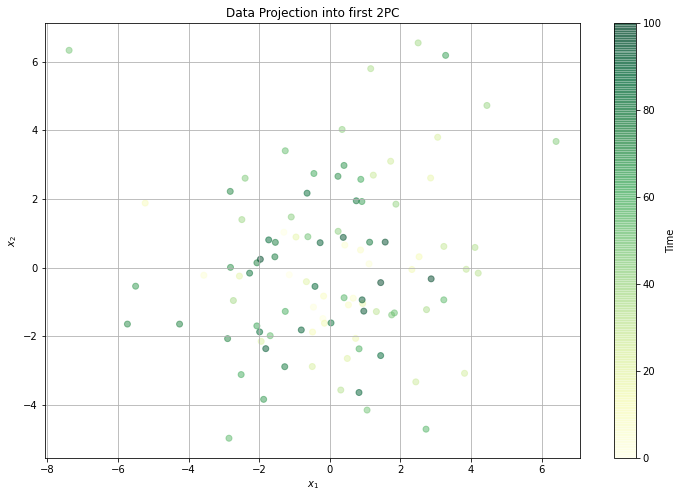

In [52]:
#In this case we have to plot the 100 points in a 2d-dimensional plot spanned by the first two PCs. 
#In other words, we have to plot a_1 vs a_2 which are nothing but the first two components of the transformed data.
plt.figure(figsize=(12,8))
colors = np.linspace(0,100,100)
plt.scatter(transformed_data[0], transformed_data[1], c = colors, cmap='YlGn', alpha = 0.5)
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
plt.title("Data Projection into first 2PC")
plt.colorbar(label = "Time")
plt.grid()
plt.show()

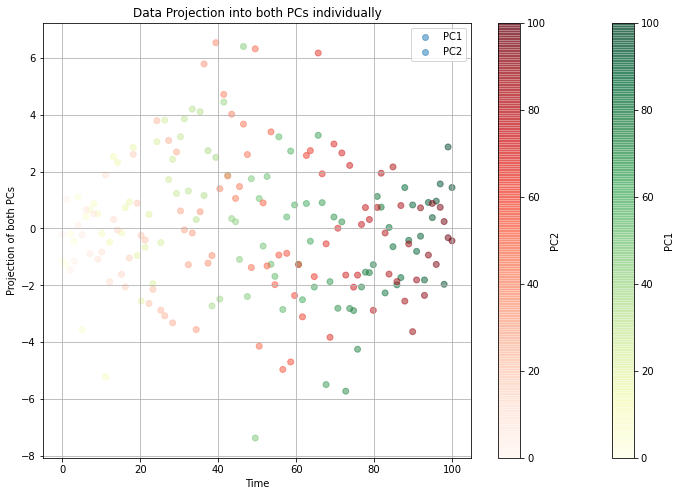

In [69]:
plt.figure(figsize=(12,8))
time = np.linspace(0,100,100)
plt.scatter(time, transformed_data[0], c = colors, cmap='YlGn', alpha = 0.5, label = 'PC1')
plt.colorbar(label = 'PC1')
plt.scatter(time, transformed_data[1], c = colors, cmap='Reds', alpha = 0.5, label = 'PC2')
plt.xlabel("Time")
plt.ylabel("Projection of both PCs")
plt.title("Data Projection into both PCs individually")
plt.colorbar(label = "PC2")
plt.grid()
plt.legend()
plt.show()

### d)

# Exercise H1.4: Image data compression and reconstruction

In [85]:
import matplotlib.image as mpimg
import os, os.path


In [90]:
# Since we select p = 5000 patches and we select 500 per image so we select max 10 images for both categories
#Create two array to categorize nature and building images
n_img = []
b_img = []

# We divide images into building and nature
for img in os.listdir('imgpca'):
    if img.startswith('n'):
        n_img.append(img)
    elif img.startswith('b'):
        b_img.append(img)

n_img



['n1.jpg',
 'n10.jpg',
 'n11.jpg',
 'n12.jpg',
 'n13.jpg',
 'n2.jpg',
 'n3.jpg',
 'n4.jpg',
 'n5.jpg',
 'n6.jpg',
 'n7.jpg',
 'n8.jpg',
 'n9.jpg']